# Feedback Alignment

In [1]:
%load_ext autoreload
%autoreload 2
import fa

In [25]:
import torch
from torch import nn
import torch.nn.functional as F 
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms

## Linear Data

In [13]:
net = fa.MLP([1, 5, 5, 1])

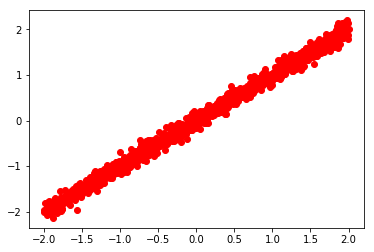

In [14]:
n = 1000
x = np.linspace(-2, 2, n).reshape(-1, 1)
y = x + 0.1 * np.random.randn(*x.shape)
plt.plot(x, y, 'ro')

In [16]:
dataset = TensorDataset(fa.toT(x), fa.toT(y))
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [17]:
def train(net, loader, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters())
    losses = []
    every = 1000
    for epoch in range(epochs):
        running_loss = 0.0
        i = 0

        for batch in loader:
            inputs, targets = batch

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            i+=1
            if i % every == 1:    # print every 2000 mini-batches
                running_loss /= every
                losses.append(running_loss)
                #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 50))
                running_loss = 0.0

    return losses

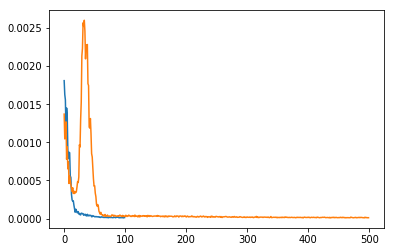

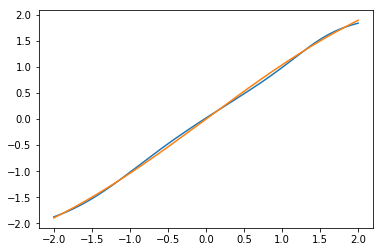

In [22]:
plt.figure(0)
net1 = fa.MLP([1, 5, 5, 1])
loss1 = train(net1, loader, 100)

net2 = fa.MLP([1, 5, 5, 1], func=fa.FALinear)
loss2 = train(net2, loader, 500)
plt.plot(loss1)
plt.plot(loss2)

plt.figure(1)
x = np.linspace(-2, 2, n).reshape(-1, 1)
y2 = fa.fromT(net1(fa.toT(x)))
y3 = fa.fromT(net2(fa.toT(x)))
plt.plot(x, y2)
plt.plot(x, y3)

## MNIST

In [121]:
net = fa.MLP([28**2, 50, 50, 10])

In [125]:
net2 = fa.MLP([28**2, 50, 50, 10], func=fa.FALinear)
fa.train_mnist(net2, epochs=50, batch_size=64)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.659605
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.464889
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.374361
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.284327
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.059069
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.944465
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.778266
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.692260
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.557094
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.352428
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.454852
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.361532
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.222107
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.958563
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.044822
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.983814
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.010901
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.767873
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.742008
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.621729
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.226918
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.144890
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.129022
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.139462
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.312992
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.282030
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.177829
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.150362
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.139746
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.140534
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.306348
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.208946
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.182275
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.130898
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.075497
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.123830
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.257254
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.226549
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.086905
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.164191


KeyboardInterrupt: 